In [62]:
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
from PAM import PAM
from matplotlib.pyplot import figure

In [63]:
df = pd.read_csv("D:\Денис2\Python\DA_lab2\minor_iad_1_22.csv", 
                                delimiter=',', 
                                encoding='windows-1251')

In [64]:
pd.set_option('display.max_rows', 100)

In [65]:
df

,Length,Width,Thickness,Working Width,Epoch
0,16.393302,1.922590,1.891140,2.328515,5.0
1,5.832936,5.456792,1.887353,1.787228,5.0
2,13.833994,2.001064,2.013591,2.486148,7.0
3,18.562147,7.235154,6.548520,3.154254,3.0
4,12.278381,8.636612,7.258937,2.644283,3.0
5,6.048630,8.237339,5.645407,2.887073,6.0
6,6.206043,6.994205,1.738095,1.045752,5.0
7,12.571855,4.180000,0.901533,3.717188,10.0
8,3.699346,11.789706,5.926506,2.015226,6.0
9,14.828274,7.048880,4.336527,3.043146,2.0


In [66]:
criter = ['Length', 'Width', 'Thickness', 'Working Width', 'Epoch']

In [67]:
ds = df.values
ds

array([[16.3933024 ,  1.92258985,  1.89113974,  2.32851455,  5.        ],
       [ 5.83293585,  5.45679247,  1.88735301,  1.78722796,  5.        ],
       [13.83399438,  2.00106438,  2.01359145,  2.4861483 ,  7.        ],
       ...,
       [15.60283717, 12.40534735,  5.64820735,  2.73977553,  5.        ],
       [17.88339836,  2.04586666,  2.04673354,  2.3254052 ,  9.        ],
       [ 6.86018578, 12.40010462,  4.85486598,  3.90486227,  6.        ]])

In [68]:
for i in range(len(criter)):
    for j in range(500):
        if df[criter[i]][j] == 'NA':
            print(criter[i], ' ', j)

итог: пропущенных значений нет

# Иерархическая кластеризация

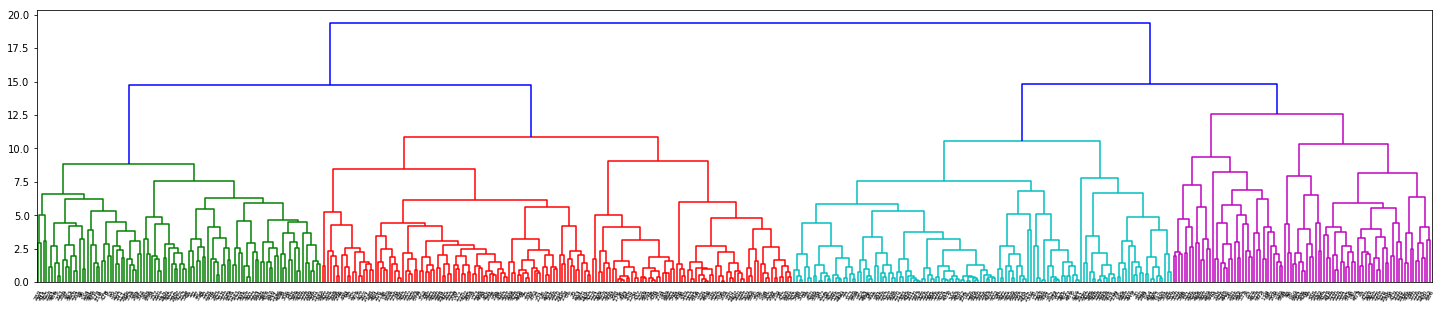

In [69]:
mergings = linkage(ds, method='complete', metric='euclidean')
plt.figure(figsize=(25, 5))
dendrogram(mergings,
           leaf_rotation=60,
           leaf_font_size=6)
plt.show()

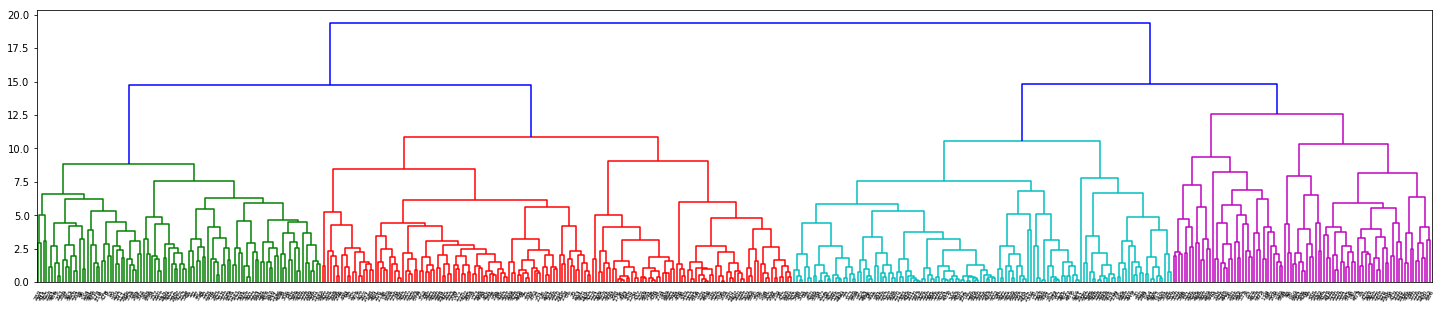

In [70]:
mergings = linkage(ds, method='complete', metric='minkowski')
plt.figure(figsize=(25, 5))
dendrogram(mergings,
           leaf_rotation=60,
           leaf_font_size=6)
plt.show()

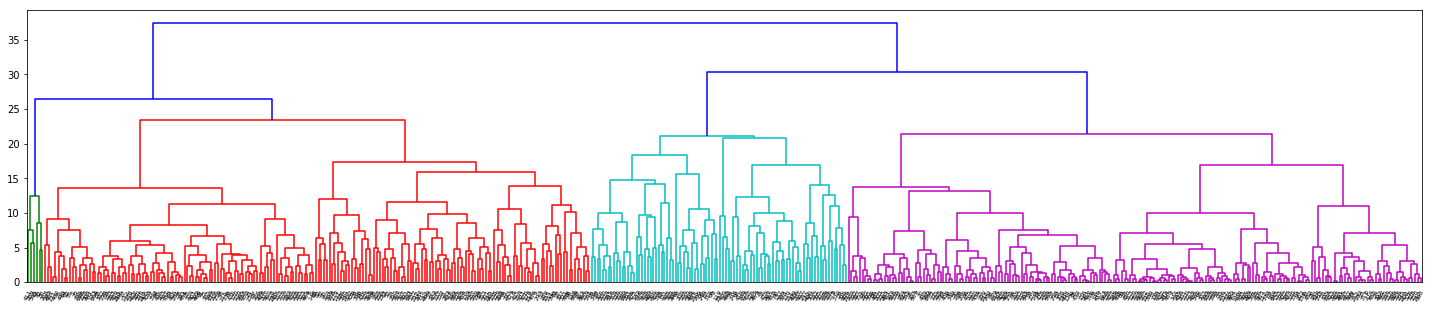

In [71]:
mergings = linkage(ds, method='complete', metric='cityblock')
plt.figure(figsize=(25, 5))
dendrogram(mergings,
           leaf_rotation=60,
           leaf_font_size=6)
plt.show()

Иерархическое распределение представлено с использованием 3 видов расстояний: Евклидово, Минсковского, Манхэттэн. В первом и втором данные разбились на 4 на взгляд одиннаковых кластера, в Cityblock на три кластера.

# DBSCAN

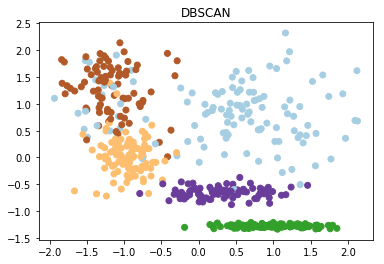

In [72]:
def dbscan(data, eps, min_samples):
    data = StandardScaler().fit_transform(data)
    db = DBSCAN(eps=eps, min_samples=min_samples)
    db.fit(data)
    y_pred = db.fit_predict(data)
    plt.scatter(data[:,0], data[:,1],c=y_pred, cmap='Paired')
    plt.title("DBSCAN")
    
dbscan(ds, 1.1, 20)

Оптимальные параметры eps=1.1, min_samples=20. С этими показателями происходит более-менее четкое разделение на 5 отдельных кластеров.

# К-mean

In [73]:
def kmean(ds, x):
    model = KMeans(n_clusters=x, 
                   init = 'k-means++',
                    n_init = 3,
                    max_iter = 100, 
                    random_state=15434)
    model.fit(ds.data)
    all_predictions = model.predict(ds.data)
    df['cluster'] = all_predictions
    return all_predictions

In [74]:
def pic(ds, all_predictions):
    fig1, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=1, ncols=4, figsize=(20, 4))
    ax1.set_title(criter[0], fontweight = 'bold')
    ax1.set_ylabel(criter[1], fontweight = 'bold')
    ax1.scatter(ds[:, 0], ds[:, 1], c=all_predictions)
    ax2.set_title(criter[0], fontweight = 'bold')
    ax2.set_ylabel(criter[2], fontweight = 'bold')
    ax2.scatter(ds[:, 0], ds[:, 2], c=all_predictions)
    ax3.set_title(criter[0], fontweight = 'bold')
    ax3.set_ylabel(criter[3], fontweight = 'bold')
    ax3.scatter(ds[:, 0], ds[:, 3], c=all_predictions)
    ax4.set_title(criter[0], fontweight = 'bold')
    ax4.set_ylabel(criter[4], fontweight = 'bold')
    ax4.scatter(ds[:, 0], ds[:, 4], c=all_predictions)
    plt.show()

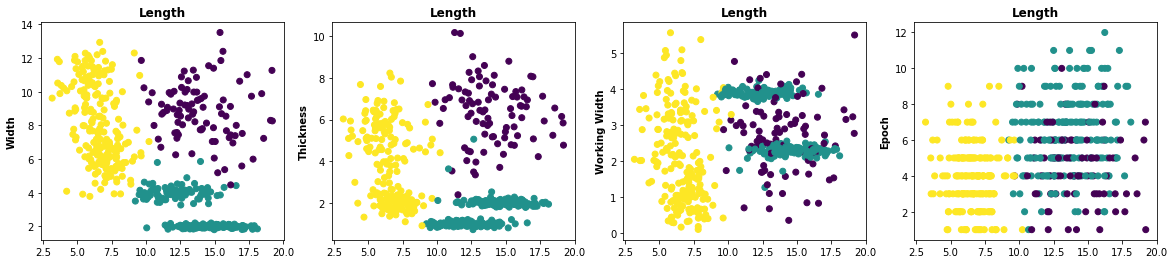

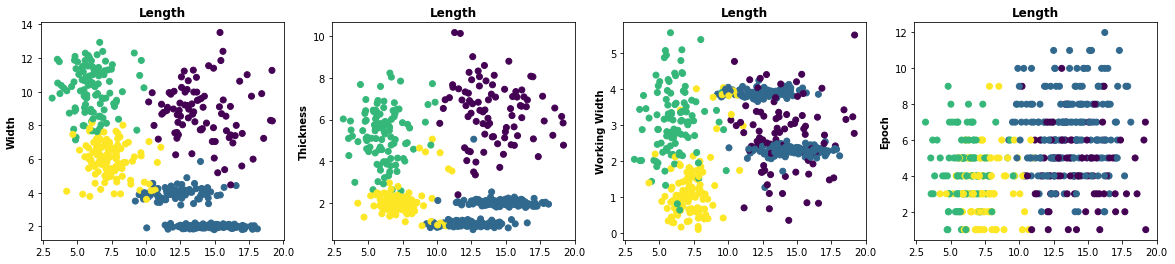

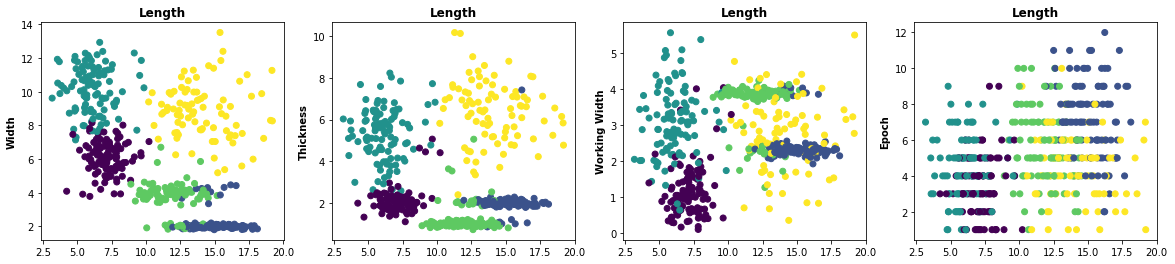

In [75]:
for i in range(3, 6):
    pic(ds, kmean(ds, i))

Для данных данных показано разделение на 3, 4 и 5 кластеров. Логичнее всего выглядят разделения на 4 и 5, так как как на 3 получается слишком большая область желтого цвета. Из 4 и 5 лучше всего использовать 5 класстеров, так как хоть 2 группы зеленого и синего цветов и близко, но они представляют из себя четко сформированные группы.

Поэтому будем использовать разделение на 5 кластеров

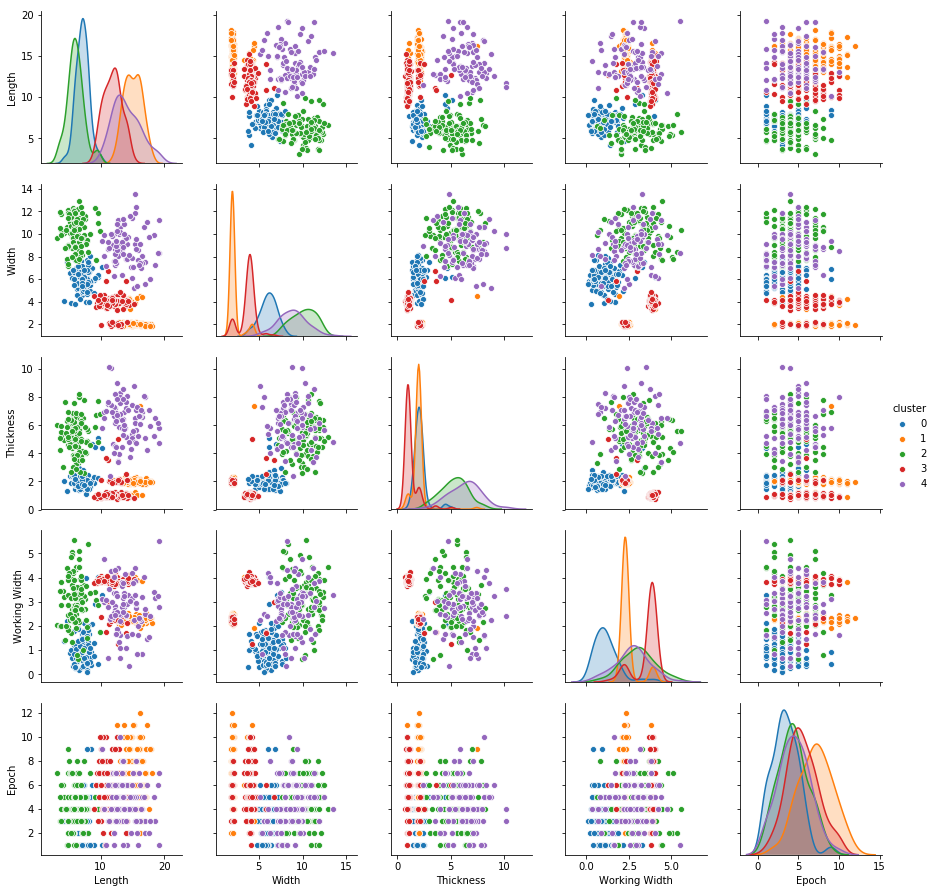

In [76]:
kmean(ds, 5)
sns.pairplot(data=df.sort_values('cluster'),  
             hue='cluster', 
             plot_kws={'alpha':1},
             vars=['Length', 'Width','Thickness','Working Width','Epoch'])
plt.show()

# Partition Around Medoids (PAM)

In [77]:
data = []
for i in range(len(ds)):
    qwe = []
    for j in range(5):
        qwe.append(ds[i][j])
    data.append(qwe)

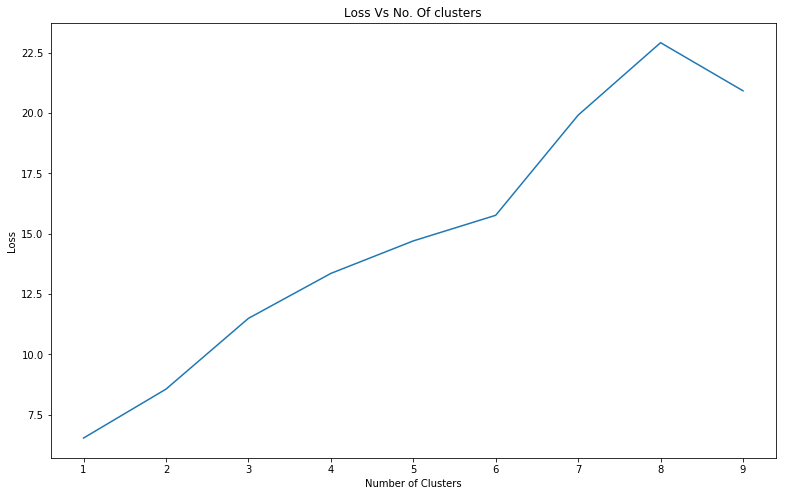

In [80]:
n_clusters = range(1,10)
k_medoids = [PAM(n_cluster=i) for i in n_clusters]
k_medoids = [k_medoid.fit(data) for k_medoid in k_medoids]
loss = [k_medoid.calculate_distance_of_clusters() for k_medoid in k_medoids]

plt.figure(figsize=(13,8))
plt.plot(n_clusters,loss)
plt.xticks(n_clusters)
plt.xlabel('Number of Clusters')
plt.ylabel('Loss')
plt.title('Loss Vs No. Of clusters')
plt.show()

Можно взять любое кол-во кластеров, так как график одинаково растет. Поэтому возьмем 5, так как это разбиение используем и в других методах.

In [60]:
def pam_pic(data, tol):
    k_medoids = PAM(n_cluster=5, tol = tol)
    k_medoids.fit(data)
    colors = {0:'b*', 1:'g^',2:'ro',3:'c*', 4:'m^', 5:'yo', 6:'ko', 7:'w*'}
    index = 0  
    for key in k_medoids.clusters.keys():
        temp_data = k_medoids.clusters[key]
        x = [data[i][0] for i in temp_data]
        y = [data[i][1] for i in temp_data]
        plt.plot(x, y, colors[index])
        index += 1
    plt.title('Cluster formations')
    plt.show()

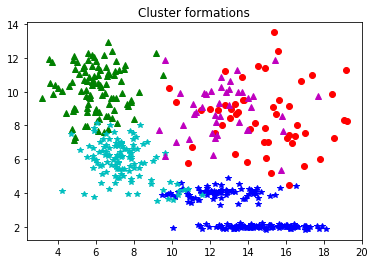

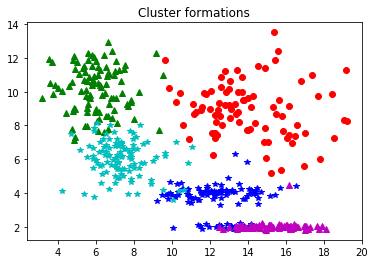

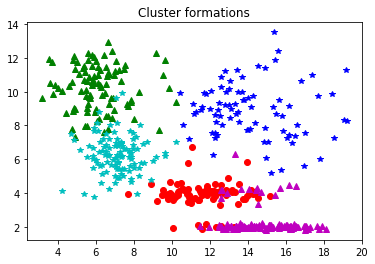

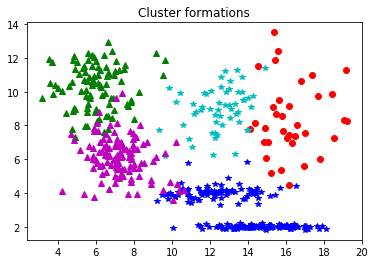

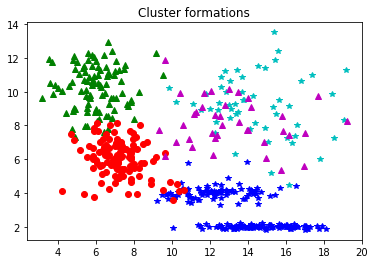

In [61]:
pam_pic(data, 0.1)
pam_pic(data, 0.2)
pam_pic(data, 0.3)
pam_pic(data, 0.4)
pam_pic(data, 0.5)

Лучшим расстоянием является tol = 0.2 или tol = 0.3, которые делят на максимально четкие 5 кластеров.

# Интерпретация, полученных измерений

Самым наглядным является данные полученные с помощью метода k-mean, и дающие ровные класстеры.

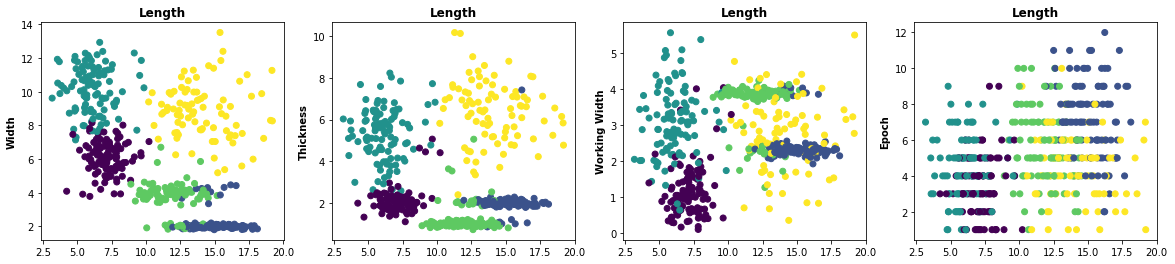

In [81]:
pic(ds, kmean(ds, 5))

### Примерными значениями орудий труда:

1) Length = 6, width = 11, thickness = 5, working width = 3.5, epoch = 5.

2) Length = 7, width = 6, thickness = 2, working width = 1, epoch = 3.

3) Length = 15, width = 9, thickness = 6, working width = 3, epoch = 5.

4) Length = 11, width = 4, thickness = 1, working width = 4, epoch = 6.

5) Length = 15, width = 2, thickness = 2, working width = 2.5, epoch = 8.

# Орудия труда

Трудно определить, что есть что, но некоторые вещи можно отметить. Третий класстер: большое широкое, толстое скорее всего использовалось как орудие изготовления других каменых орудий труда. Четвертый: длинный и очень тонкий - это ножи. Пятый кластер: длинный узная и плоская палочка, появившаяся очень давно - возможно палка для разжигания костра, то есть хозяйственная. Второй класстер - с маленькой рабочей поверхностью, похож на каменные наконечники для копий, то есть оружия. И наконец первый кластер - это орудия для собиратальства и строительства, такие как например топор.